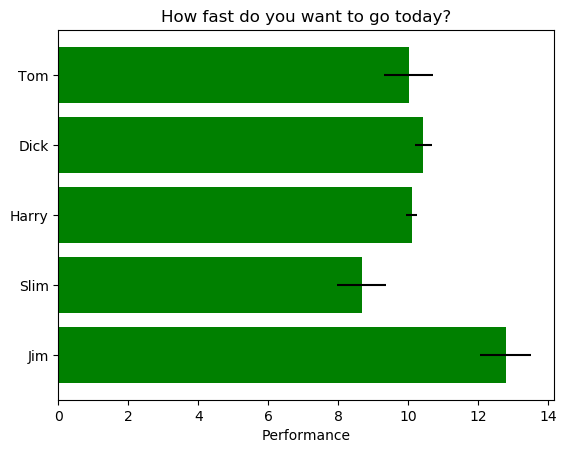

In [12]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

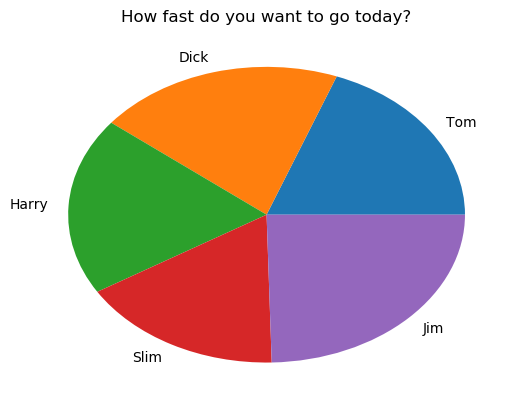

In [13]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


In [5]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\cwcol\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\sample_data\\goog.npz'

In [ ]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
water_treatment_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/water-treatment/water-treatment.data'
water_data = pd.read_csv(water_treatment_url, header=None)
#replace ?
water_data.replace('?',np.nan, inplace=True)
water_data.head()


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,D-1/3/90,44101,1.50,7.8,NaN,407,166,66.3,4.5,2110,...,2000,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,NaN,443,214,69.2,6.5,2660,...,2590,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,NaN,528,186,69.9,3.4,1666,...,1888,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
water_data.describe(include='all')

In [ ]:
plt.scatter(water_data[15], water_data[16])

In [ ]:
grouped_data = water_data[15].groupby(water_data[16])
grouped_data

In [ ]:
list(grouped_data)

In [ ]:
plt.boxplot([group for name, group in grouped_data]);

In [ ]:
boxplot_data = [group for name, group in grouped_data]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title('Water conducitity by PH')
bp =plt.boxplot(boxplot_data, sym='+')

ax1.set_axisbelow(True)
ax1.set_title('Water conductivity by pH')
ax1.set_xlabel('pH Levels')
ax1.set_ylabel('Conductivity')

#plt.setp(ax1,xticklabels=sorted(water_data[16].unique()))
plt.setp(ax1,xticklabels=[name for name, group in grouped_data])

plt.show()

# assignment

In [15]:
#load data from 11/6
import requests
url = "https://api.spacexdata.com/v3/launches/"

r = requests.get(url)
data = r.json()
df =pd.DataFrame(data)
df.head()
list_launch_site = df['launch_site'].tolist()
list_rocket = df['rocket'].tolist()
df_launch_site = pd.DataFrame(list_launch_site)
df_rocket = pd.DataFrame(list_rocket)

In [16]:
df_1 = pd.concat([df, df_launch_site, df_rocket], axis=1).drop(columns = ['launch_site','rocket'])
df_1.head()

,details,flight_number,is_tentative,launch_date_local,launch_date_unix,launch_date_utc,launch_success,launch_year,links,mission_id,...,upcoming,site_id,site_name,site_name_long,fairings,first_stage,rocket_id,rocket_name,rocket_type,second_stage
0,Engine failure at 33 seconds and loss of vehicle,1,False,2006-03-25T10:30:00+12:00,1143239400,2006-03-24T22:30:00.000Z,False,2006,{'mission_patch': 'https://images2.imgbox.com/...,[],...,False,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,"{'reused': False, 'recovery_attempt': False, '...","{'cores': [{'core_serial': 'Merlin1A', 'flight...",falcon1,Falcon 1,Merlin A,"{'block': 1, 'payloads': [{'payload_id': 'Falc..."
1,Successful first stage burn and transition to ...,2,False,2007-03-21T13:10:00+12:00,1174439400,2007-03-21T01:10:00.000Z,False,2007,{'mission_patch': 'https://images2.imgbox.com/...,[],...,False,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,"{'reused': False, 'recovery_attempt': False, '...","{'cores': [{'core_serial': 'Merlin2A', 'flight...",falcon1,Falcon 1,Merlin A,"{'block': 1, 'payloads': [{'payload_id': 'Demo..."
2,Residual stage 1 thrust led to collision betwe...,3,False,2008-08-02T15:34:00+12:00,1217648040,2008-08-02T03:34:00.000Z,False,2008,{'mission_patch': 'https://images2.imgbox.com/...,[],...,False,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,"{'reused': False, 'recovery_attempt': False, '...","{'cores': [{'core_serial': 'Merlin1C', 'flight...",falcon1,Falcon 1,Merlin C,"{'block': 1, 'payloads': [{'payload_id': 'Trai..."
3,Ratsat was carried to orbit on the first succe...,4,False,2008-09-28T11:15:00+12:00,1222643700,2008-09-28T23:15:00.000Z,True,2008,{'mission_patch': 'https://images2.imgbox.com/...,[],...,False,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,"{'reused': False, 'recovery_attempt': False, '...","{'cores': [{'core_serial': 'Merlin2C', 'flight...",falcon1,Falcon 1,Merlin C,"{'block': 1, 'payloads': [{'payload_id': 'RatS..."
4,None,5,False,2009-07-13T15:35:00+12:00,1247456100,2009-07-13T03:35:00.000Z,True,2009,{'mission_patch': 'https://images2.imgbox.com/...,[],...,False,kwajalein_atoll,Kwajalein Atoll,Kwajalein Atoll Omelek Island,"{'reused': False, 'recovery_attempt': False, '...","{'cores': [{'core_serial': 'Merlin3C', 'flight...",falcon1,Falcon 1,Merlin C,"{'block': 1, 'payloads': [{'payload_id': 'Raza..."


In [17]:
from pandas.io.json import json_normalize
fs_list = df_1['first_stage'].tolist()
df_fs = pd.DataFrame(fs_list)
cores_list = df_fs['cores'][:].tolist()
df_cores = pd.DataFrame(cores_list)
cores0_list = df_cores[0].tolist()
df_cores0 = pd.DataFrame(cores0_list)
cores1_list = df_cores[1].tolist()
df_cores1 = pd.DataFrame(cores1_list)
cores2_list = df_cores[2].tolist()
df_cores2 = pd.DataFrame(cores2_list)

In [18]:
cores1_list

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 {'core_serial': 'B1025',
  'flight': 2,
  'block': 2,
  'gridfins': True,
  'legs': True,
  'reused': True,
  'land_success': True,
  'landing_intent': True,
  'landing_type': 'RTLS',
  'landing_vehicle': 'LZ-2'},
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 {'core_serial': None,
  'flight': None,
  'block': None,
  'gridfins': None,
  'legs': None,
  'reused': None,
  'land_success': None,
  'landing_intent': None,
  'landing_type': None,
  'landing_vehicle': None},
 None,
 None,
 {'core_serial': None,
  'flight

In [19]:
df_2 = pd.concat([df_cores0, df_1],axis = 1).drop(columns = ['first_stage'])

In [20]:
ss_list = df_2['second_stage'].tolist()
df_block = pd.DataFrame(ss_list)
payloads_list = df_block['payloads'].tolist()
df_payloads = pd.DataFrame(payloads_list)

In [21]:
df_payloads[0].tolist()
df_payloads0 = pd.DataFrame(df_payloads[0].tolist())
df_orbit_params = pd.DataFrame(df_payloads0['orbit_params'].tolist())
df_3 = pd.concat([df_2, df_payloads0, df_orbit_params],axis =1).drop(columns = ['orbit_params','second_stage'])

In [22]:
type(df_3['launch_date_local'][0])

str

In [23]:
df_3['year'] = df_3['launch_date_local'].apply(lambda x: x[:4])


# Satellite launch type by year

In [24]:
l = df_3.groupby(['year', 'regime']).agg({'regime': np.size})
l.head(), type(l)

(                regime
 year regime           
 2006 low-earth       1
 2007 low-earth       1
 2008 low-earth       2
 2009 low-earth       1
 2010 low-earth       2, pandas.core.frame.DataFrame)

In [25]:
l['regime'], type(l['regime'])

(year  regime         
 2006  low-earth           1
 2007  low-earth           1
 2008  low-earth           2
 2009  low-earth           1
 2010  low-earth           2
 2012  low-earth           2
 2013  geostationary       1
       low-earth           2
 2014  geostationary       3
       low-earth           3
 2015  L1-point            1
       geostationary       2
       low-earth           4
 2016  geostationary       6
       low-earth           3
 2017  geostationary       6
       geosynchronous      1
       low-earth          10
       sun-synchronous     1
 2018  geostationary      10
       high-earth          1
       low-earth           9
       sun-synchronous     4
 2019  geostationary       1
       low-earth           6
       sub-orbital         1
       sun-synchronous     3
 Name: regime, dtype: int64, pandas.core.series.Series)

In [ ]:
l['regime'].index

In [ ]:
l['regime'].unstack(level=1).plot(kind='bar', stacked=True)
plt.title("Satellite launch type by year")
plt.show()


In [ ]:
l['regime'].unstack(level=1)

# Customer pie chart

In [ ]:
df_3['customers'] = df_3['customers'].apply(lambda x: "".join(x))

In [ ]:
l2 = df_3.groupby('customers').size()
l2 = l2.sort_values(ascending=True)

In [ ]:
import matplotlib.pyplot as plt
labels = l2.index
sizes = l2
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels)
ax1.axis('equal')
plt.show()

# average payload mass(kg) over time

In [ ]:
l3 =df_3.groupby(['year']).agg({'payload_mass_kg': np.mean})

In [ ]:
plt.scatter(l3.index,l3.values)
plt.title("Average payload over time")
plt.show()